# SWOT L3 Global Mosaic

Takes all SWOT L3 swath passes from Cycle 16 into a global mosaic.
From AVISO L3 Basic, SWOT L3_LR_SSH_BASIC https://www.aviso.altimetry.fr/en/data/products/sea-surface-height-products/global/swot-l3-ocean-products.html

**Product**: SWOT L3_LR_SSH Basic v2.0.1  
**Cycle**: 016 (May 29 - June 18, 2024)  
**Passes**: 567 swaths  
**Resolution**: 2 km along-track  

**Variables**:
- `ssha_filtered`: Sea surface height anomaly (calibrated, filtered)
- `ssha_unfiltered`: Sea surface height anomaly (calibrated, unfiltered)
- `mdt`: Mean dynamic topography





In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path
from glob import glob
import warnings
warnings.filterwarnings('ignore')

## Load L3 Swath Files

Load all netCDF files from the cycle 016 directory (after downloading from AVISO FTP)

In [2]:
data_dir = Path('swot_l3_cycle016')
nc_files = sorted(glob(str(data_dir / '*.nc')))
print(f"Found {len(nc_files)} files")

Found 567 files


In [3]:
# Get date range from filenames
first_file = Path(nc_files[0]).stem
last_file = Path(nc_files[-1]).stem
start_date = first_file.split('_')[6]
end_date = last_file.split('_')[7]
print(f"Date range: {start_date} to {end_date}")

Date range: 001 to 20240619T004337


In [4]:
# Check sample file for metadata
sample_ds = xr.open_dataset(nc_files[0])
print(f"Swath dimensions: {sample_ds.dims['num_lines']} x {sample_ds.dims['num_pixels']}")
print(f"Variables: {list(sample_ds.data_vars.keys())}")
sample_ds.close()

Swath dimensions: 9860 x 69
Variables: ['time', 'mdt', 'ssha_filtered', 'ssha_unfiltered', 'i_num_line', 'i_num_pixel']


Plotting 567 swaths...
  50/567
  100/567
  150/567
  200/567
  250/567
  300/567
  350/567
  400/567
  450/567
  500/567
  550/567


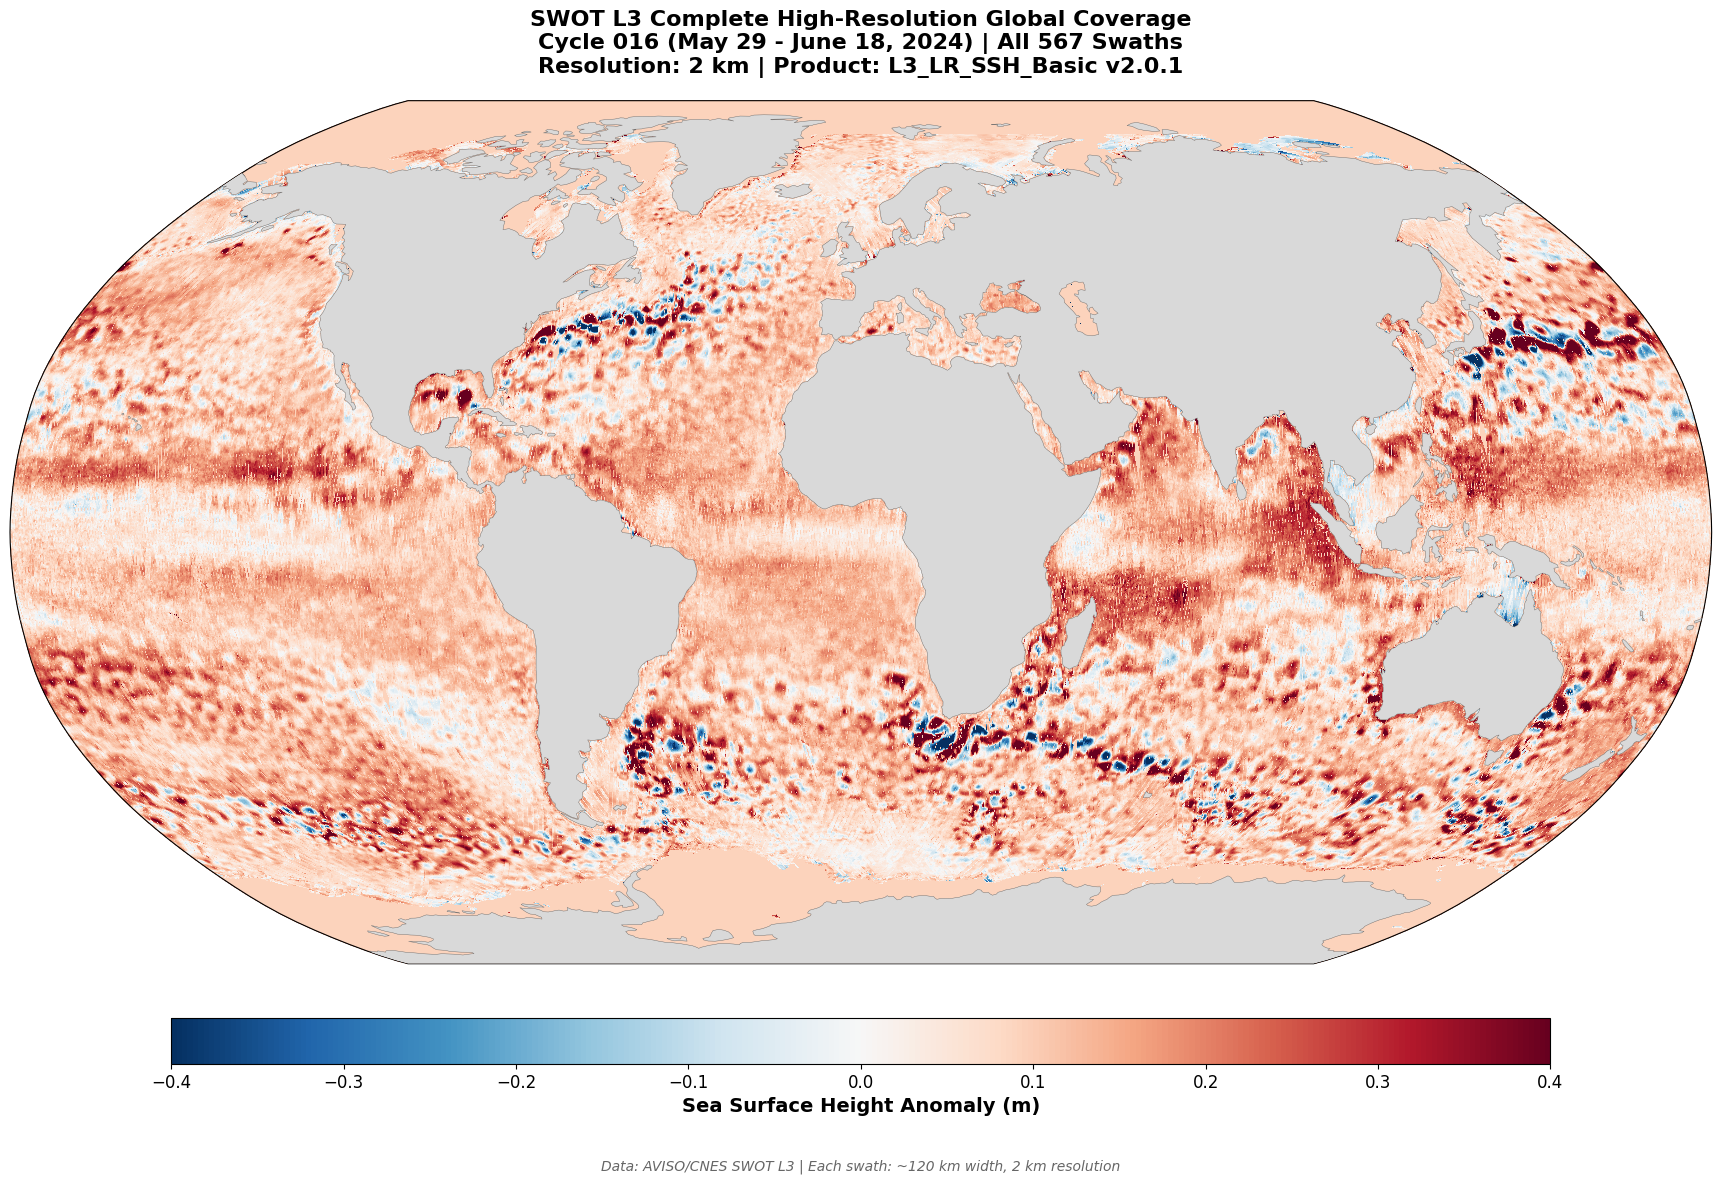

Saved to: swot_cycle16_global_coverage.png


In [5]:
fig = plt.figure(figsize=(20, 12), facecolor='white')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

print(f"Plotting {len(nc_files)} swaths...")

cmap = plt.cm.RdBu_r.copy()
cmap.set_bad('white', alpha=0)

for i, nc_file in enumerate(nc_files):
    if (i + 1) % 50 == 0:
        print(f"  {i + 1}/{len(nc_files)}")
    
    try:
        ds = xr.open_dataset(nc_file)
        lons = ds['longitude'].values
        lats = ds['latitude'].values
        ssha = ds['ssha_filtered'].values
        
        ax.pcolormesh(lons, lats, ssha,
                     transform=ccrs.PlateCarree(),
                     cmap=cmap,
                     vmin=-0.4, vmax=0.4,
                     shading='auto',
                     rasterized=True)
        
        ds.close()
    except Exception as e:
        continue

ax.set_facecolor('white')
ax.add_feature(cfeature.LAND, facecolor='#d9d9d9', edgecolor='none', zorder=10)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='#666666', zorder=11)

# Title
title_text = f"SWOT L3 Complete High-Resolution Global Coverage\n"
title_text += f"Cycle 016 (May 29 - June 18, 2024) | All {len(nc_files)} Swaths\n"
title_text += f"Resolution: 2 km | Product: L3_LR_SSH_Basic v2.0.1"
ax.set_title(title_text, fontsize=16, weight='bold', pad=20)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-0.4, vmax=0.4))
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', 
                    pad=0.05, shrink=0.7, aspect=30)
cbar.set_label('Sea Surface Height Anomaly (m)', fontsize=14, weight='bold')
cbar.ax.tick_params(labelsize=12)

# Footer
footer_text = "Data: AVISO/CNES SWOT L3 | Each swath: ~120 km width, 2 km resolution"
fig.text(0.5, 0.02, footer_text, ha='center', fontsize=10, style='italic', color='#666666')

ax.set_global()
plt.tight_layout()
plt.savefig('swot_cycle16_global_coverage.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"Saved to: swot_cycle16_global_coverage.png")